In [1]:
from gerrychain import Graph, Partition
import networkx as nx
from gerrychain.constraints import contiguous
import inspect
import geopandas as gp
from plotting import plot_district_map

In [2]:
# We have to add edges to make the UT House and Senate districts contiguous

In [22]:
# Using the graph_august that is output from Algorithmic-Merging-v4
g = Graph.from_json('ChainUtilityData/graph_august.json')
data = gp.read_file('UtahData/gdf_august.shp')

In [4]:
g.add_edges_from([(216, 69), (216, 72), (130, 521), (130, 522), (100, 522), (100, 527), (100, 532), (100, 539), (211, 212)], shared_perim=0.0)
# g.to_json('ChainUtilityData/graph_august.json') # <-- uncomment to use

In [23]:
#for n in g.nodes:
    #g.nodes[n]['CountyID'] -= 1
    #g.nodes[n]['UT_SEN'] -= 1
    #g.nodes[n]['UT_HOUSE'] -= 1
#g.to_json('ChainUtilityData/graph_august.json')

In [5]:
partition = Partition(g, 'UT_SEN')
for key, val in partition.parts.items():
    l = list(nx.connected_components(g.subgraph(val)))
    if len(l) > 1:
        print(key)
        print(l)

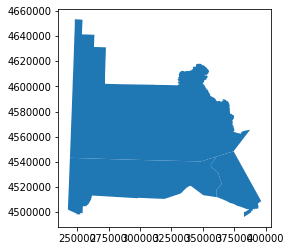

In [6]:
data[data.index.isin([216, 69, 72])].plot()

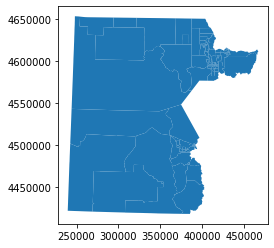

In [7]:
data[data['UT_SEN'].isin([17])].plot()

In [8]:
partition = Partition(g, 'UT_HOUSE')
for key, val in partition.parts.items():
    l = list(nx.connected_components(g.subgraph(val)))
    if len(l) > 1:
        print(key)
        print(l)

In [9]:
contiguous(partition)

True

In [10]:
# Fixing Senate district #17
# Add edges: (216, 69), (216, 72)

# Fixing House district #55
# Add edges: (130, 521), (130, 522), (100, 522), (100, 527), (100, 532), (100, 539)

# Fixing House district #1
# Add edge (211, 212)

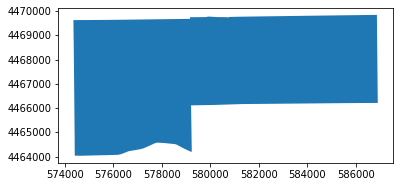

In [11]:
data[data.index.isin([527])].plot()

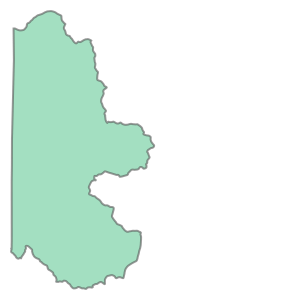

In [12]:
data.iloc[212]['geometry']

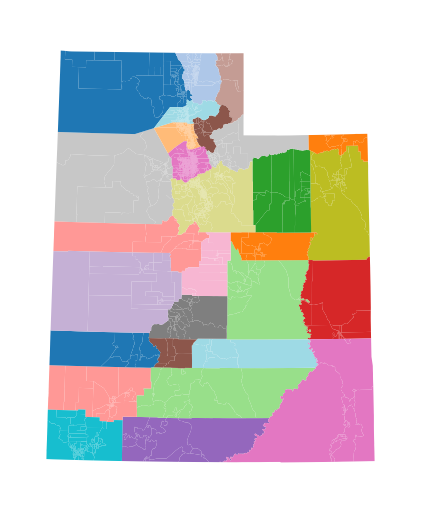

In [17]:
plot_district_map(Partition(g, 'CountyID').assignment, cmap='tab20')